In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Homework_2_function_headers_group6 import gauss
from Homework_2_function_headers_group6 import waveguide
from Homework_2_function_headers_group6 import beamprop_CN
import matplotlib.cm as cm
import matplotlib.colors as color

In [2]:
background_dark = True
if background_dark:
    plt.style.use('dark_background')

# Introduction
The following task is about solving the Beam propagation method for a given Gaussian beam profile at the input of a step indexed waveguide and see its propagation along the propagation distance within the waveguide.

This is done by numerical solving the paraxial wave equation with the help of the  explicit implicit Crank-Nicholson method. Also, the convergence of this algorithm with the resolution of the step size and computation space of grid size is investigated.

# Theory
The problem is modelled as follow, the propagation of the beam along the dimension of interest which here is the z-axis is distributed into two parts. One carries the fast oscillations which anyways isn’t that important while analysing the power distribution in space as the fast propagating parts carry no information in this regard. Using these equations simplifies the generic wave question into a much more computationally simple one called the paraxial wave equation. This equation also suits our physical system, and we are precisely looking at the propagation of the beam within a narrow divergence regime at the centre of the waveguide, hence the light propagated almost parallel to z-axis.

Hence a general field profile can be represented as :
$$\Phi(x, y, z)=\phi(x, y, z) \exp \left(-i k n_0 z\right)$$
where $\Phi(x, y, z)$  represents the slowly varying part. Now a refractive index can be chosen to vary along z-axis as well but weakly to stimulate large index contrast, which here we represent through the step index profile.

Switching further within the scalar regime and operating under the SVEA one can then reduce the Helmholtz’s equation into the scalar paraxial wage equation, which in 1D reads as follows
$$\left[i \frac{\partial}{\partial z}+\frac{1}{2 \bar{k}} \frac{\partial^2}{\partial x^2}+\frac{k^2(x)-\bar{k}^2}{2 \bar{k}}\right] v(x, z)=0$$
where k_ represents the average refractive index seen along z-axis (This encapsulates the negligible changes of n along z-axis).

Rearranging this equation leads to:
$$\frac{\partial}{\partial z} v(x, z)=\left[\frac{i}{2 \bar{k}} \frac{\partial^2}{\partial x^2}+i \frac{k^2(x)-\bar{k}^2}{2 \bar{k}}\right] v(x, z)=\boldsymbol{L} v(x, z)$$
Hence, we have $\boldsymbol{L} v(x, z)=\frac{i}{2 \bar{k}} \frac{\partial^2 v(x, z)}{\partial x^2}+i W(x) v(x, z)$
where $W(x)={\frac{k^{2}(x)-{\bar{k}}^{2}}{2{\bar{k}}}}$
After employing the finite difference method, as seen in the previous task, one can turn the Linear operator L^ into a Matrix representation. This leads to:
$$
\begin{gathered}
\mathbf{L}=\frac{i}{2 \bar{k}(\Delta x)^2}\left(\begin{array}{ccccc}
-2 & 1 & 0 & \cdots & 0 \\
1 & -2 & 1 & & \vdots \\
0 & \ddots & \ddots & \ddots & 0 \\
\vdots & & 1 & -2 & 1 \\
0 & \cdots & 0 & 1 & -2
\end{array}\right)+i\left(\begin{array}{ccccc}
W_1 & 0 & \cdots & & 0 \\
0 & \ddots & & & \vdots \\
\vdots & & W_j & & \\
& & & \ddots & 0 \\
0 & \cdots & & 0 & W_N
\end{array}\right) \\
W_j=\frac{k^2\left(x_j\right)-\bar{k}^2}{2 \bar{k}}
\end{gathered}
$$

This takes care of the R.H.S. Whereas the L.H.S can be evaluated by using any of the following algorithms:
1)The Forward Difference Method:
$${\frac{\partial}{\partial z}}v_{j}(z){\bigg|}_{z^{n}}\approx{\frac{v_{j}^{n+1}-v_{j}^{n}}{\Delta z}}\approx\sum_{l}L_{j l}v_{l}^{n}$$
2)The Backward Difference Method
$$\left.\frac{\partial}{\partial z}\,\bar{v_{j}}(z)\right|_{z^{n+1}}\approx\frac{v_{j}^{n+1}-v_{j}^{n}}{\Delta z}\approx\sum_{l}L_{j l}v_{l}^{n+1}$$
3)The central Difference Method
$$\left.\frac{\partial}{\partial z}\nu_{j}(z)\right|_{z^{n+1/2}}\approx\frac{\nu_{j}^{n+1}-\nu_{j}^{n}}{\Delta z}\approx\frac{1}{2}\sum_{l}\left({\cal L}_{j l}\nu_{l}^{n}+{\cal L}_{j l}\nu_{l}^{n+1}\right)$$
But upon analysing the stability condition one finds that the while forward method is unstable, the backward difference though being stable does not comply with energy conservation.
Which leaves us with the central method being the optimal one.

The Crank Nicholson method:
After following the central difference method for the L.H.S and after rearranging one reaches with a linear matrix equation which quantifies what is called the Crank-Nicholson Method.
It is represented as following:
$$
\begin{aligned}
\left(\mathbf{I}-\frac{1}{2} \Delta z \mathbf{L}\right) \mathbf{v}^{n+1} & =\left(\mathbf{I}+\frac{1}{2} \Delta z \mathbf{L}\right) \mathbf{v}^n \\
\mathbf{A} \mathbf{v}^{n+1} & =\mathbf{B} \mathbf{v}^n
\end{aligned}
$$

# Implementation
Our Task was to apply Crank-Nicolson (CN) scheme to implement the Beam Propagation Method(BPM) for a 1D Gaussian field distribution. In 1D field, the scalar paraxial wave equation can be written as

$$\frac{\partial}{\partial z} v(x,z) = [\frac{i}{2\bar{k}} \frac{\partial^2}{\partial x^2}+i\frac{k^2(x)-\bar{k}^2}{2\bar{k}}] v(x,z)$$

where $k(x) = \frac{2\pi}{\lambda}n(x)$, and $\bar{k}$ is the average value of $k$.

So our first step is to create the linear differential operator L:
$$L=\frac{i}{2\bar{k}} \frac{\partial^2}{\partial x^2}+i\frac{k^2(x)-\bar{k}^2}{2\bar{k}}$$

which is shown in the lines of 10-15 of the source code. Due to the very high sparseness of matrix L, `scipy.sparse` package was used to define tridiagonal matrix L. The secondary and the main diagonals of L are defined on lines 11 and 12. Line 4 moves the secondary diagonals 1 position left and right away from the main diagonal. In line 15 `dia-array`  was used to assemble the operator matrix L.

The second step to implement the CN scheme to calculate $v_{n+1}$. As mentioned above, CN is an explicit-implicit method, we obtain the central difference by averaging between for- and backward difference, yields,
$$(I - \frac{1}{2}\Delta zL)v_{n+1} = (I + \frac{1}{2}\Delta zL)v_n$$
where I is an identity matrix with the same size of L. The solution of the above equation are calculated by using `scipy.spares.spsolve` function as shown in lines 22 and 23. `Scipy.sparse` can save computer memory and reduce computation time significantly.

The whole source code of CN method is shown below.

In [3]:
#| echo: true
def beamprop_CN(v_in, lam, dx, n, nd, z_end, dz, output_step=1):

    size = dz * output_step
    z = np.arange(0, z_end, size)

    N = len(v_in)
    k = 2 * np.pi / lam * n
    k_mean = 2 * np.pi / lam * nd
    W = (k ** 2 - k_mean ** 2) / (2 * k_mean)
    sec = (1j / (2 * k_mean * dx ** 2)) * np.ones(N)
    main = -2 * sec + 1j * W
    data = np.array([sec, main, sec])
    offsets = np.array([-1, 0, 1])
    L = sps.dia_array((data, offsets), shape=(N, N)).tocsc()
    I = sps.eye(N)
    A = I - 0.5 * size * L
    B = I + 0.5 * size * L

    v = np.zeros((N, len(z))).astype('complex')
    v[:, 0] = v_in
    for i in range(1, len(z)):
        v[:, i] = spsolve(A, B @ v[:, i-1])

    return v, z

In [3]:
xa = 50
xb = 2
Nx = 251
n_cladding = 1.45
n_core = 1.46
w = 5
z_end = 100
dz = 0.5
nd = 1.455
wl = 1
dx = xa / (Nx-1)

# Examples
The Figure 3 shows the example considered to simulate the BPM method. For this a step index profile with respective refractive index for core and cladding are specified, which is ploted in Fig. 1. Then an input beam profile plotted in Fig. 2, which is chosen to be normalized Gaussian is selected as our input optical signal for this example.

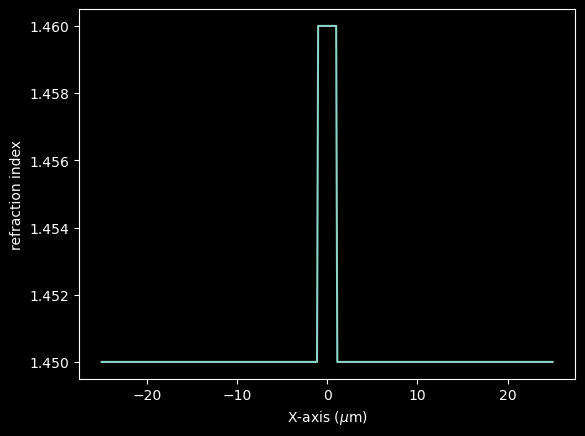

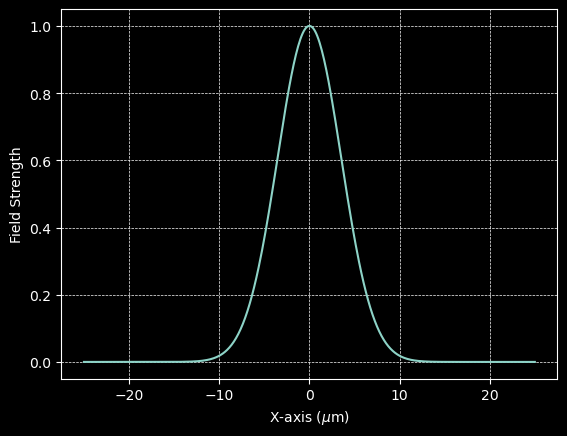

In [32]:
#| layout: [47, -6, 47]
#| fig-cap:
#|   - "refractive index distribution"
#|   - "Gaussian field distribution"

n, x = waveguide(xa, xb, Nx, n_cladding, n_core)
plt.plot(x, n)
plt.xlabel('X-axis ($\mu$m)')
plt.ylabel('refraction index')
plt.show()

v_in, x = gauss(xa, Nx, w)
plt.plot(x, v_in)
plt.xlabel(r'X-axis ($\mu$m)')
plt.ylabel('Field Strength')
plt.grid(lw=0.5, linestyle='--')
plt.show()

In [8]:
Nx, dz = 251, 0.5
dx = xa / (Nx-1)
v_in, x = gauss(xa, Nx, w)
n, x = waveguide(xa, xb, Nx, n_cladding, n_core)
v_out, z = beamprop_CN(v_in, wl, dx, n, nd, z_end, dz)

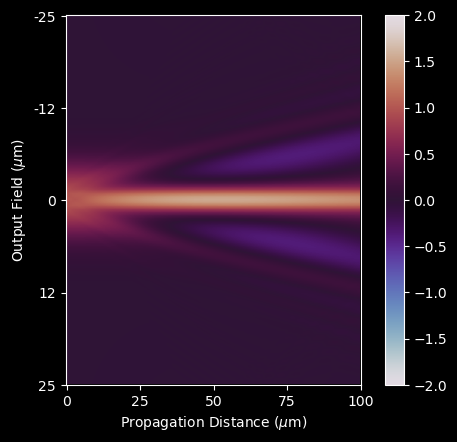

In [9]:
#| layout-ncol: 1
#| fig-cap:
#|   - "The field distribution with given parameters"

norm = color.Normalize(-2., 2.)
twilight = cm.ScalarMappable(norm=norm, cmap="twilight")
plt.imshow(v_out.real, cmap="twilight", vmin=-2., vmax=2.)
plt.xlabel(r"Propagation Distance ($\mu$m)")
plt.ylabel("Output Field ($\mu$m)")
plt.yticks(np.linspace(0,Nx,5), np.linspace(-25, 25, 5).astype("int"))
plt.xticks(np.linspace(0,len(z),5), np.linspace(0, 100, 5).astype("int"))
plt.colorbar(twilight)
plt.show()

\newpage
# Convergence Tests
The accuracy and convergence of the implemented algorithm are relative to two parameters, the resolution of the field distribution (dx) determined by the number of grid points (Nx) and the step size of propagation (dz).
The convergence of the beam propagation method in dependence of the dx is tested with the following script:

In [4]:
#| echo:true
dx = xa / (5001-1)
v_in, x = gauss(xa, 5001, w)
n, x = waveguide(xa, xb, 5001, n_cladding, n_core)
v_ref, _ = beamprop_CN(v_in, wl, dx, n, nd, z_end, dz)
v_ref = v_ref[::5001//50,:].real
rmse_Nx = []
dx_Nx = []
Nx_test = np.linspace(51, 1001, 20).astype('int')
for N in Nx_test:
    dx = xa / (N-1)
    v_in, x = gauss(xa, N, w)
    n, x = waveguide(xa, xb, N, n_cladding, n_core)
    v_out, _ = beamprop_CN(v_in, wl, dx, n, nd, z_end, dz)
    v_out = v_out.real[::N//50,:]
    rmse_Nx.append(np.sqrt(np.mean(v_out - v_ref)**2))
    dx_Nx.append(dx)

The range of Nx is set to 51 to 1001 in line 9. A `for` loop is used to compute the output field with `beampro_CN` function for each Nx. Because the numbers of grid points are different, the output fields have different shapes. Hence, we unified the shape by picking the values at the integer position alone x-axis (..., -2, -1, 0, 1, 2, ...) in line 15. At last, The root-mean-square error (RMSE) between each output field and the true field
$$ RMSE = \sqrt{\frac{\sum{(v_{out}-v_{true})^2}}{N}}$$
was calculated in line 16. The ground truth field distribution is approximated by the result for a huge value of Nx (5001).
The RMSE vs the number of grid points (Nx) is plotted in Fig. 4. With the increase of grid points the RMSE reduce steadily，and the downward trend is becoming less pronounced. When the grid points are more than 350, in order words dx is less than 0.14 $\mu m$, RMSE drop to less than $10^{-3}$.

The step size in propagation is also one of parameter affecting the output fields. The convergence in dependence of the step size is tested with the range of $0.005\mu m$ to $1\mu m$ and the approximate true output field is calculated with dz = $0.001\mu m$. The results are presented in Fig. 5. In general, the RMSE increases with increasing of step size, and there is an oscillation when dz is in the range of $0.6\mu m$ to $0.9\mu m$. However, for all dz values，the RMSEs are smaller than $10^{-5}$. As conclusion, the step size is not the major factor affecting the result of CN method.

In [25]:
Nx = 401
dx = xa / (Nx - 1)
dz = 0.001
v_in, x = gauss(xa, Nx, w)
n, x = waveguide(xa, xb, Nx, n_cladding, n_core)
v_ref, _ = beamprop_CN(v_in, wl, dx, n, nd, z_end, dz)
v_ref = v_ref[:, ::int(1/0.001)].real
rmse_dz = []
dz_test = np.linspace(0, 200, 21)
dz_test[0] += 1
dz_test = 1 / dz_test
for d in dz_test:
    v_out, _ = beamprop_CN(v_in, wl, dx, n, nd, z_end, d)
    rmse_dz.append(np.sqrt(np.mean(v_out.real[:, ::int(1/d)] - v_ref) ** 2))

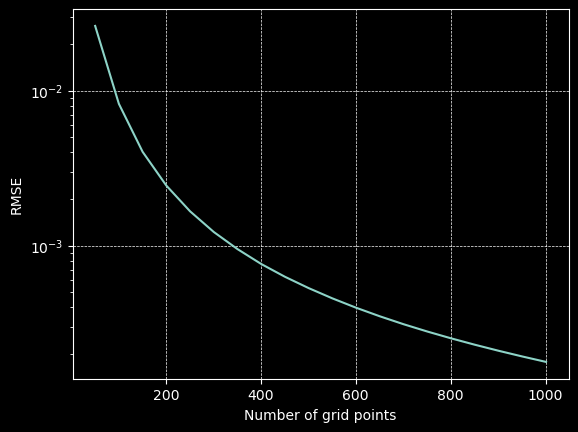

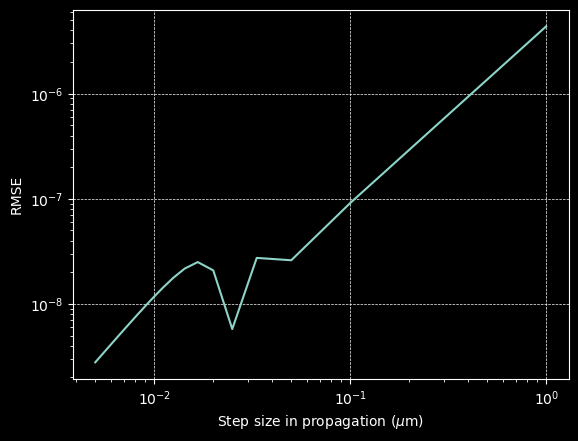

In [26]:
#| layout: [47, -6, 47]
#| fig-cap:
#|   - "Convergence of the field distribution upon variation of Number of grid points"
#|   - "Convergence of the field distribution upon variation of Step size in propagation direction"
plt.plot(Nx_test, rmse_Nx)
plt.yscale('log')
plt.grid(lw=0.5, linestyle='--')
plt.xlabel('Number of grid points')
plt.ylabel('RMSE')
plt.show()

plt.plot(dz_test, rmse_dz)
plt.yscale('log')
plt.xscale('log')
plt.grid(lw=0.5, linestyle='--')
plt.xlabel('Step size in propagation ($\mu$m)')
plt.ylabel('RMSE')
plt.show()

Figure 6 visualizes the change of the result caused by increasing of Nx. The cyclic colormap 'twilight' was used. As discussed above, dz have a limit influence to the result. We decrease dz with increasing of Nx to keep the numbers of points in z and x direction identical and give a better visualization. The initial gaussian field concentrates in the area of the code alone with propagation. In case of Nx = 101, the central amplitude of the gaussian field reduce slightly. In other cases, there is no difference among the result by different Nx.

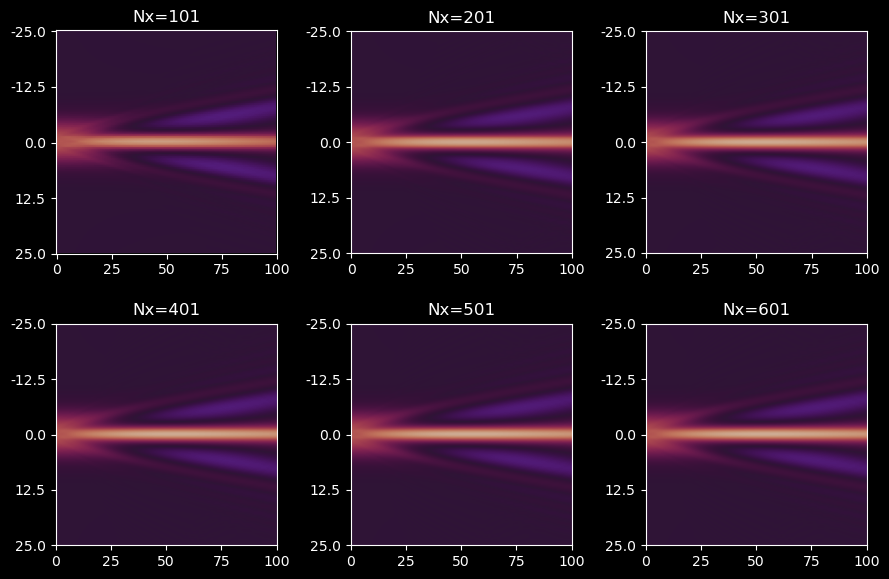

In [10]:
#| layout-ncol: 1
#| fig-cap:
#|   - "field distributions upon with variation of Nx"
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
dz = 0.5
for Nx, ax in zip([101, 201, 301, 401, 501, 601], axes.flatten()):
    dx = xa / (Nx-1)
    dz = 100 / (Nx-1)
    v_in, x = gauss(xa, Nx, w)
    n, x = waveguide(xa, xb, Nx, n_cladding, n_core)
    v_out, z = beamprop_CN(v_in, wl, dx, n, nd, z_end, dz, output_step=1)
    ax.imshow(v_out.real, cmap="twilight", vmin=-2., vmax=2.)
    ax.set_title(r'Nx=%i'%Nx)
    ax.set_yticks(np.linspace(0,Nx,5), np.linspace(-25, 25, 5))
    ax.set_xticks(np.linspace(0,len(z),5), np.linspace(0, 100, 5).astype("int"))
plt.tight_layout()